# Paper-Revising 

# Visulization for NEW re-trained model - Single_LJSpeech
# 10 test audios

#### 1. This notebook is to do the retrained model audios whole length prediction steps
#### 2. training dataset based on the single speaker, length=400s.
#### 3. fixed 5-layer-LSTM model
#### 4. use 10 audio files to test the results.

In [1]:
import os
import json
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from core.data_processor import DataLoader
from core.model import Model
from keras.utils.vis_utils import plot_model


# 绘图展示结果
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.grid()
    plt.show()
    #plt.savefig('results_2.png')


def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')
    
def plot_results_multiple_onlypre(predicted_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    #ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')

In [2]:

#创建RNN模型
model = Model()
#mymodel = model.build_model(configs)

model_path = '/home/shh/Desktop/LSTM_Final/saved_models/paper_revising/Model_Summary/LJSpeech_6Layers_20102023-005904-e50.h5'
model.load_model(filepath = model_path)
#plot_model(mymodel, to_file='model.png',show_shapes=True)

[Model] Loading model from file /home/shh/Desktop/LSTM_Final/saved_models/paper_revising/Model_Summary/LJSpeech_6Layers_20102023-005904-e50.h5


In [3]:
### 1

In [4]:

#读取所需参数
configs = json.load(open('640-80-5-layers-SingleLJSpeech-final-visual.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename1']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

In [5]:
#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

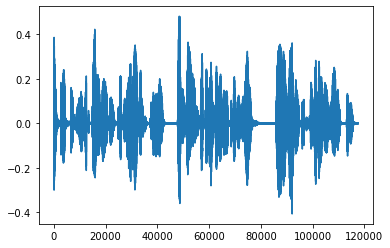

In [6]:
plt.plot(y_test)# without normal

In [7]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


[Model] Predicting Sequences Multiple...


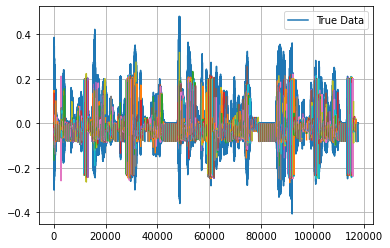

In [8]:

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [9]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test1_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test1_predicted.wav", flat_predictions_multiseq, sr)

In [10]:
### 2

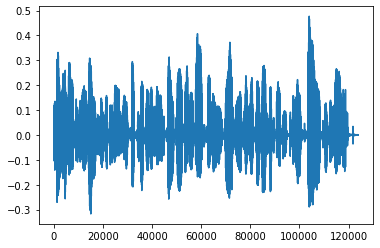

In [11]:

#读取所需参数
configs = json.load(open('640-80-5-layers-SingleLJSpeech-final-visual.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename2']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

plt.plot(y_test)# without normal

In [12]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


[Model] Predicting Sequences Multiple...


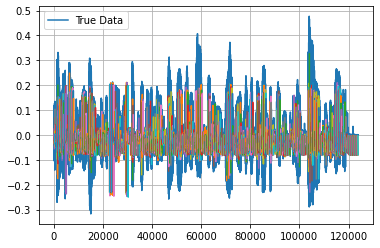

In [13]:

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [14]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test2_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test2_predicted.wav", flat_predictions_multiseq, sr)

In [15]:
### 3

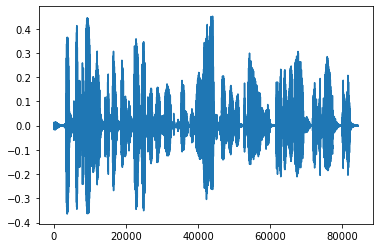

In [16]:

#读取所需参数
configs = json.load(open('640-80-5-layers-SingleLJSpeech-final-visual.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename3']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

plt.plot(y_test)# without normal

In [17]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


[Model] Predicting Sequences Multiple...


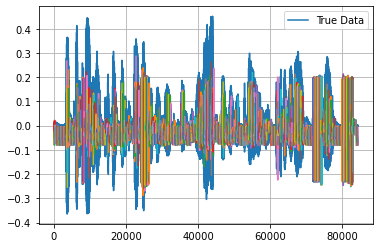

In [18]:

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [19]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test3_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test3_predicted.wav", flat_predictions_multiseq, sr)

In [20]:
### 4

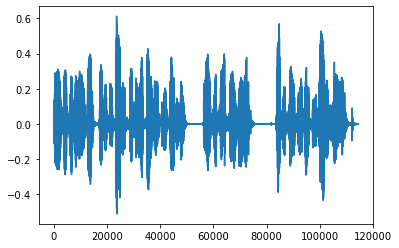

In [21]:

#读取所需参数
configs = json.load(open('640-80-5-layers-SingleLJSpeech-final-visual.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename4']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

plt.plot(y_test)# without normal

In [22]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


[Model] Predicting Sequences Multiple...


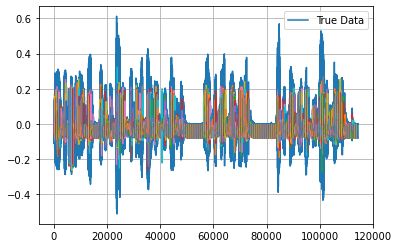

In [23]:

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [24]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test4_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test4_predicted.wav", flat_predictions_multiseq, sr)

In [25]:
### 5

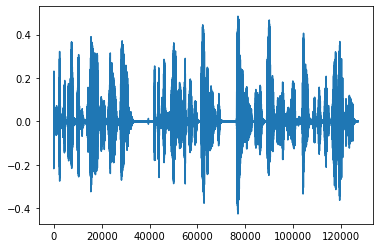

In [26]:

#读取所需参数
configs = json.load(open('640-80-5-layers-SingleLJSpeech-final-visual.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename5']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

plt.plot(y_test)# without normal

In [27]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


[Model] Predicting Sequences Multiple...


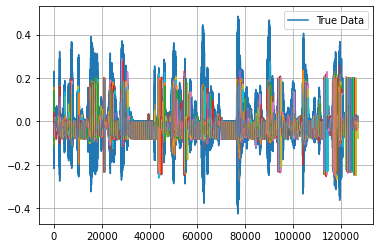

In [28]:

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [29]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test5_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test5_predicted.wav", flat_predictions_multiseq, sr)

In [30]:
### 6

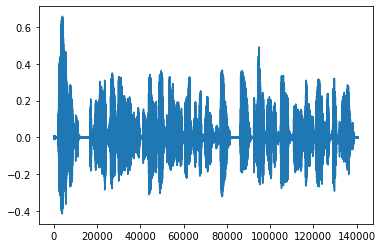

In [31]:

#读取所需参数
configs = json.load(open('640-80-5-layers-SingleLJSpeech-final-visual.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename6']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

plt.plot(y_test)# without normal

In [32]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


[Model] Predicting Sequences Multiple...


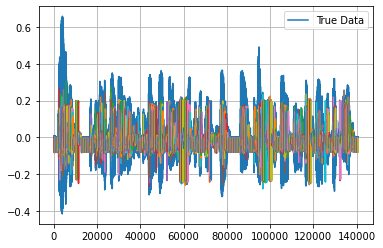

In [33]:

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [34]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test6_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test6_predicted.wav", flat_predictions_multiseq, sr)

In [35]:
### 7

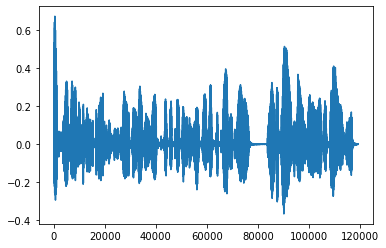

In [36]:

#读取所需参数
configs = json.load(open('640-80-5-layers-SingleLJSpeech-final-visual.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename7']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

plt.plot(y_test)# without normal

In [37]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


[Model] Predicting Sequences Multiple...


KeyboardInterrupt: 

In [ ]:

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [ ]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test7_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test7_predicted.wav", flat_predictions_multiseq, sr)

In [ ]:
### 8

In [ ]:

#读取所需参数
configs = json.load(open('640-80-5-layers-SingleLJSpeech-final-visual.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename8']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

plt.plot(y_test)# without normal

In [ ]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


In [ ]:

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [ ]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test8_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test8_predicted.wav", flat_predictions_multiseq, sr)

In [ ]:
### 9

In [ ]:

#读取所需参数
configs = json.load(open('640-80-5-layers-SingleLJSpeech-final-visual.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename9']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

plt.plot(y_test)# without normal

In [ ]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


In [ ]:

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [ ]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test9_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test9_predicted.wav", flat_predictions_multiseq, sr)

In [ ]:
### 10

In [ ]:

#读取所需参数
configs = json.load(open('640-80-5-layers-SingleLJSpeech-final-visual.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename10']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

plt.plot(y_test)# without normal

In [ ]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


In [ ]:

# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [ ]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]


flat_predictions_multiseq = flatten(predictions_multiseq)
#plt.plot(flat_predictions_multiseq)

# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

#plt.plot(y_test_flatten)

import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test10_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/FINAL_Results/SingleSpeaker/LJSpeech/6layer_test10_predicted.wav", flat_predictions_multiseq, sr)